<h1>HW 4 Sample Solution</h1>

1. [40 points] obtain a model estimating the likelihood of customer churn using Decision
Trees,
2. [40 points] compare several model evaluation metrics and back up your model selection
decision based on the performance of various measures (e.g. ROC AUC, recall etc.),
3. [20 points] calculate and plot (you may even use Excel, if you like) Gain and Lift for 10
equally populated groups of customers.

The steps I followed to complete the analysis and comply with the HW requirements are the following:
1. Descriptive analysis
2. Decision Tree on raw data
3. Decision Tree on transformed data
4. Conclusion, selection of the winning model, feature importances, gain and lift charts

### Descriptive analysis

In [1]:
#for not showing warnings
import warnings
warnings.filterwarnings('ignore')

#data manipulation and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from collections import defaultdict

#libraries for modelling and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
import scikitplot as skplt #in case of error run <<!pip install scikit-plot>> and run the code again


In [2]:
#importing the data and making a dataframe
data=pd.read_excel("Telecom_Churn.xls", sheet_name="churn")

In [3]:
#data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account Length    3333 non-null int64
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Eve Mins          3333 non-null float64
Night Mins        3333 non-null float64
Intl Mins         3333 non-null float64
CustServ Calls    3333 non-null int64
Churn             3333 non-null int64
Int'l Plan        3333 non-null int64
VMail Plan        3333 non-null int64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
State             3333 non-null object
Area Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(11), object(2)
memory usage: 546.9+ KB


In [4]:
#have a look at first rows of the dataframe
data.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [5]:
data.describe()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,0.276628,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,0.447398,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,1.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [6]:
#checking number of duplicates, missing values and columns with a single value
print("Duplicates:", data.duplicated().sum())
print("Missing values:", data.isna().sum().sum())
print("Single valued columns:", data.columns[data.nunique()==1])

Duplicates: 0
Missing values: 0
Single valued columns: Index([], dtype='object')


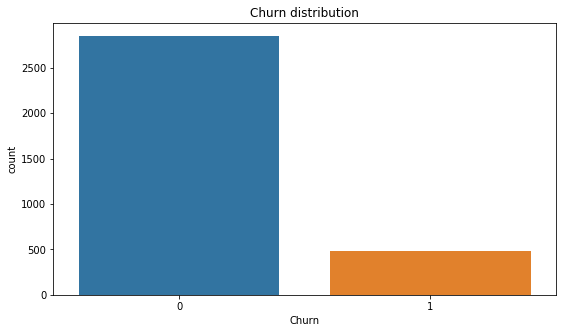

In [7]:
#let's visualise the distribution of churn
plt.figure(figsize=(9,5))
sns.countplot(data.Churn)
plt.title("Churn distribution")
plt.show()

In [8]:
#lets count the benchmark for employee churn
data.Churn.value_counts(normalize=True).mul(100).rename("Churn percentage")

0    85.508551
1    14.491449
Name: Churn percentage, dtype: float64

### Decision Tree on raw data

In my opinion, it is more important to correctly predict the customers who will leave.Therefore, the metrics for choosing the winning model will be cross-validated recall score, as now we use sklearn library.

In [9]:
#State and Phone have a lot of values, which cannot be somehow grouped and will result in a lot of dummy columns.
#So we will drop them too.
data.drop(["State","Phone","VMail Plan"], axis=1, inplace=True)

In [10]:
#making dummes,train test split
data_dum=pd.get_dummies(data, drop_first=True)

In [11]:
#separating X and Y
Y=data_dum["Churn"]
X=data_dum.drop("Churn",axis=1)

In [12]:
#splitting the data into train and test sets
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.20, random_state=42)

In [13]:
#setting up the ranges for hyperparameters
param_dt={"max_depth":range(8,20),"min_samples_leaf":range(70,260,10),
          "class_weight":["balanced", None]}

In [14]:
#Cross-Validated Gridsearch using parameters, use n_jobs=-1 for faster computing and 
gs_dt=GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),param_grid=param_dt,scoring="recall",cv=5,n_jobs=2)
gs_dt.fit(X0,Y0)

C:\Users\Srbuhi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'max_depth': range(8, 20), 'min_samples_leaf': range(70, 260, 10), 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [15]:
#let's see the optimal parameters
gs_dt.best_params_

{'class_weight': 'balanced', 'max_depth': 8, 'min_samples_leaf': 80}

In [16]:
#fitting the model with best parameters
dt_grid=DecisionTreeClassifier(class_weight="balanced",max_depth=8,
                             min_samples_leaf=80, random_state=42).fit(X0,Y0)

#getting probabilities
Y0_dt_grid=dt_grid.predict_proba(X0)[:,1]
Y1_dt_grid=dt_grid.predict_proba(X1)[:,1]


In [17]:
#calculating roc auc score 
print("Recall Train for Tuned DT:",recall_score(Y0,dt_grid.predict(X0)).round(2))
print("Recall Test for Tuned DT:",roc_auc_score(Y1,dt_grid.predict(X1)).round(2))
print("Accuracy Train for Tuned DT:",accuracy_score(Y0,dt_grid.predict(X0)).round(2))
print("Accuracy Test for Tuned DT:",accuracy_score(Y1,dt_grid.predict(X1)).round(2))
print("ROC_AUC Train for Tuned DT:",roc_auc_score(Y0,Y0_dt_grid).round(2))
print("ROC_AUC Test for Tuned DT:",roc_auc_score(Y1,Y1_dt_grid).round(2))
#Mean cross val score for model with default hyperparameters
print("Mean 5-fold Recall score for DT Tuned hyperparameters:",np.mean(cross_val_score(estimator=dt_grid, X=X,y=Y,cv=5, scoring="recall")).round(2))

Recall Train for Tuned DT: 0.85
Recall Test for Tuned DT: 0.84
Accuracy Train for Tuned DT: 0.82
Accuracy Test for Tuned DT: 0.82
ROC_AUC Train for Tuned DT: 0.91
ROC_AUC Test for Tuned DT: 0.87
Mean 5-fold Recall score for DT Tuned hyperparameters: 0.81


### Decision Tree on transformed data

I saved the transformed data from the previous HW into csv file to use it here. Let's see how DT will perform in this case.

In [18]:
data_tr=pd.read_csv('transformed_telco_churn.csv')

In [19]:
#as you see, we have new, reduced dataset for telco churn
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 7 columns):
Day Mins               3333 non-null float64
CustServ Calls         3333 non-null int64
Churn                  3333 non-null int64
Day Charge             3333 non-null float64
Eve Charge             3333 non-null float64
VMail Message_other    3333 non-null int64
Int'l Plan_1           3333 non-null int64
dtypes: float64(3), int64(4)
memory usage: 182.4 KB


In [20]:
#making dummes,train test split
data_dum_tr=pd.get_dummies(data_tr, drop_first=True)

In [21]:
#separating X and Y
Y_tr=data_dum_tr["Churn"]
X_tr=data_dum_tr.drop("Churn",axis=1)

In [22]:
#splitting the data into train and test sets
X0_tr, X1_tr, Y0_tr, Y1_tr = train_test_split(X_tr, Y_tr, test_size=0.20, random_state=42)

In [23]:
#setting up the ranges for hyperparameters
param_dt_tr={"max_depth":range(10,20),"min_samples_leaf":range(10,100,5),
          "class_weight":["balanced", None]}

In [24]:
#Cross-Validated Gridsearch using parameters, use n_jobs=-1 for faster computing and 
gs_dt_tr=GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),param_grid=param_dt_tr,scoring="recall",cv=5,n_jobs=2)
gs_dt_tr.fit(X0_tr,Y0_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'max_depth': range(10, 20), 'min_samples_leaf': range(10, 100, 5), 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [25]:
#let's see the optimal parameters
gs_dt_tr.best_params_

{'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 80}

In [26]:
#fitting the model with best parameters
dt_grid_tr=DecisionTreeClassifier(class_weight="balanced",max_depth=10,
                             min_samples_leaf=80,random_state=42).fit(X0_tr,Y0_tr)

#getting probabilities
Y0_dt_grid_tr=dt_grid_tr.predict_proba(X0_tr)[:,1]
Y1_dt_grid_tr=dt_grid_tr.predict_proba(X1_tr)[:,1]


In [27]:
#calculating roc auc score 
print("Recall Train for Tuned DT:",recall_score(Y0_tr,dt_grid_tr.predict(X0_tr)).round(2))
print("Recall Test for Tuned DT:",roc_auc_score(Y1_tr,dt_grid_tr.predict(X1_tr)).round(2))
print("Accuracy Train for Tuned DT:",accuracy_score(Y0_tr,dt_grid_tr.predict(X0_tr)).round(2))
print("Accuracy Test for Tuned DT:",accuracy_score(Y1_tr,dt_grid_tr.predict(X1_tr)).round(2))
print("ROC_AUC Train for Tuned DT:",roc_auc_score(Y0_tr,Y0_dt_grid_tr).round(2))
print("ROC_AUC Test for Tuned DT:",roc_auc_score(Y1_tr,Y1_dt_grid_tr).round(2))
#Mean cross val score for model with default hyperparameters
print("Mean 5-fold Recall score for DT Tuned hyperparameters:",np.mean(cross_val_score(estimator=dt_grid_tr, X=X_tr,y=Y_tr,cv=5, scoring="recall")).round(2))

Recall Train for Tuned DT: 0.85
Recall Test for Tuned DT: 0.84
Accuracy Train for Tuned DT: 0.82
Accuracy Test for Tuned DT: 0.82
ROC_AUC Train for Tuned DT: 0.9
ROC_AUC Test for Tuned DT: 0.88
Mean 5-fold Recall score for DT Tuned hyperparameters: 0.81


As we see, the only improvement is with ROC-AUC score: recall on test set and cross-val score remain the same. Thus, we will continue with the first model, as it has more features and can provide more information from customer behavior analysis point.

### Conclusion, selection of the winning model, feature importances, gain and lift charts

We have chosen to select as winner the first model, as it has more features and could be more useful in future in terms of analysing and understanding reasons of customer churn. From metrics comparison point, both models have same recall on train-test sets and in cross-val score. Thus, let's see what are the most important features and draw gain and lift charts for the model based on raw data.
According to the first model, the most important feature is Cust_serve calls, which contributes to almost 32% gini reduction. Next comes International Plan and Daytime Minutes.

In [28]:
dt_grid.feature_importances_

array([0.00568197, 0.        , 0.21765284, 0.00622683, 0.00726445,
       0.        , 0.31601549, 0.26112743, 0.01937789, 0.09870292,
       0.        , 0.04266209, 0.00867809, 0.00409039, 0.        ,
       0.0125196 , 0.        ])

In [29]:
#making a dataframe for convenient usage
feat_imp=pd.DataFrame(dt_grid.feature_importances_,index=X.columns,
                      columns=["Feature_imp"])
feat_imp=feat_imp.sort_values(by="Feature_imp",ascending=False)
feat_imp.head()

,Feature_imp
CustServ Calls,0.316015
Int'l Plan,0.261127
Day Mins,0.217653
Day Charge,0.098703
Eve Charge,0.042662


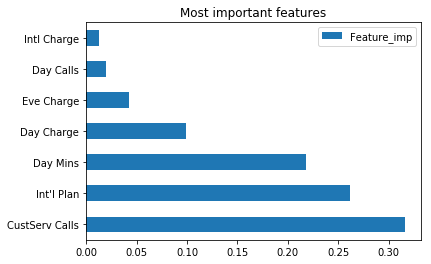

In [30]:
#visualizing feature importances
feat_imp.head(7).plot.barh()
plt.title("Most important features")
plt.show()

C:\Users\Srbuhi\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


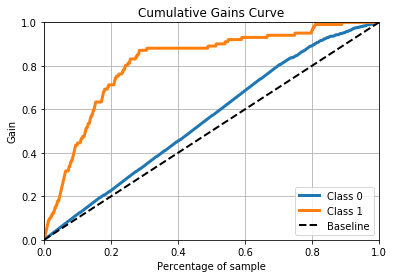

In [31]:
#gain and lift charts
#Cummulative gain curve
skplt.metrics.plot_cumulative_gain(Y1,dt_grid.predict_proba(X1))
plt.show()

C:\Users\Srbuhi\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


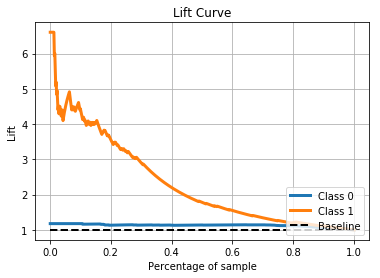

In [32]:
#lift curve
skplt.metrics.plot_lift_curve(Y1,dt_grid.predict_proba(X1))
plt.show()